In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import sent_tokenize

In [2]:
traind = pd.read_csv('all_nobias.csv')

In [6]:
traind = traind.dropna()

In [7]:
#traind['condition']=traind.astype({'condition': 'int64'}).dtypes

In [8]:
traind.dtypes

sentence      object
condition    float64
dtype: object

In [9]:
traind.shape

(5731, 2)

In [10]:
traind.sample(20)

,sentence,condition
1558,It’s evil.,0.0
150,Fine I'll buzz it short.,0.0
5050,scared myself the past few nights with these t...,1.0
4472,"""Brothers Raphael and Michael.",0.0
1229,I really feel alone.,1.0
1359,I turned it off and stared at a wall for awhile.,1.0
538,Caiaphas didn’t say New Orleans like a local w...,0.0
2808,I wanted to look good.,0.0
326,"Anyways, so they continued to delay - I waited...",1.0
1773,Everytime something good happens ten more shit...,1.0


In [11]:
count= traind['condition']==1
check=traind[count]
check.count()

sentence     1827
condition    1827
dtype: int64

In [12]:
traind[traind.isnull().any(axis=1)].count()

sentence     0
condition    0
dtype: int64

In [3]:
traind = traind.sample(5731)

In [4]:
traind.head(10)

,sentence,condition
908,“It was your lunch break not your naptime.,0.0
248,In middle school my first ever girlfriend brok...,1.0
3922,I didn't give her what she needed.,1.0
2581,"So right now, I feel like a failure after a we...",1.0
1592,She lost two ships in the scrum due to her dis...,0.0
1373,"“Alice Winters, my gratitude for your haste in...",0.0
3682,Know the feeling when you fucked up in your li...,1.0
2427,Or I'll spend 30 minutes browsing Steam store ...,1.0
4314,It’s not just some fun.ive been going through ...,0.0
3055,I feel like I'm being judged for crying wolf.,0.0


In [5]:
traind.reset_index(drop=True)

,sentence,condition
0,“It was your lunch break not your naptime.,0.0
1,In middle school my first ever girlfriend brok...,1.0
2,I didn't give her what she needed.,1.0
3,"So right now, I feel like a failure after a we...",1.0
4,She lost two ships in the scrum due to her dis...,0.0
5,"“Alice Winters, my gratitude for your haste in...",0.0
6,Know the feeling when you fucked up in your li...,1.0
7,Or I'll spend 30 minutes browsing Steam store ...,1.0
8,It’s not just some fun.ive been going through ...,0.0
9,I feel like I'm being judged for crying wolf.,0.0


In [6]:
traind.shape

(5731, 2)

In [7]:
dbpedia_df = traind.astype({'condition': 'int64'})

In [8]:
dbpedia_df.dtypes

sentence     object
condition     int64
dtype: object

In [9]:
X = dbpedia_df['sentence']
Y = dbpedia_df['condition']

In [10]:
X

908            “It was your lunch break not your naptime.
248     In middle school my first ever girlfriend brok...
3922                   I didn't give her what she needed.
2581    So right now, I feel like a failure after a we...
1592    She lost two ships in the scrum due to her dis...
1373    “Alice Winters, my gratitude for your haste in...
3682    Know the feeling when you fucked up in your li...
2427    Or I'll spend 30 minutes browsing Steam store ...
4314    It’s not just some fun.ive been going through ...
3055        I feel like I'm being judged for crying wolf.
115     The tears were not going to stop until I let e...
932     Each choice branched out to more and more points.
3432    Now steel yourselves soldiers of the Imperium,...
3801    I either lose intrest or am so out of mind tha...
1438    Whatever, thanks for listening to me for the -...
3350    Unfortunately, over the years, I think I've he...
581                             I am Jepthath, your king.
3167    The pa

In [12]:
count_vectorizer = CountVectorizer(min_df=0, max_df=80, ngram_range=(1, 2))

feature_vector = count_vectorizer.fit_transform(X)

feature_vector.shape  

(5731, 54957)

In [13]:
tfidf_transformer = TfidfTransformer()

feature_vector = tfidf_transformer.fit_transform(feature_vector)

feature_vector.shape

(5731, 54957)

In [14]:
def summarize_classification(y_test, y_pred):

    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [15]:
X_dense = feature_vector.todense()

In [16]:
X_dense.shape

(5731, 54957)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_dense, Y, test_size = 0.2)

In [18]:
clf = GaussianNB().fit(x_train, y_train)

In [19]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [20]:
y_test

1938    1
2834    0
1856    1
3830    0
4372    0
1286    0
1963    0
1732    0
3051    0
1934    0
2781    0
2034    1
1311    1
4254    0
3641    0
758     0
1195    0
2368    1
4931    0
5432    1
1692    0
3865    1
3414    0
4448    0
5245    0
2704    1
1058    0
2075    0
3324    0
1155    0
       ..
2274    0
1369    0
1326    0
2295    0
3202    0
4819    0
2132    0
2412    1
1367    0
1188    0
2151    1
3900    0
1926    1
5380    0
2013    1
4204    1
5517    0
5068    0
1961    1
910     1
2843    0
938     0
1890    0
2267    0
1115    0
210     0
5267    0
5727    0
155     1
2630    0
Name: condition, Length: 1147, dtype: int64

In [21]:
summarize_classification(y_test, y_pred)

Length of testing data:  1147
accuracy_count :  759
accuracy_score :  0.6617262423714037
precision_score :  0.6742549108372695
recall_score :  0.6617262423714037


In [23]:
x_train.shape,  y_train.shape

((4584, 54957), (4584,))

In [27]:
import torch
import numpy as np

In [34]:
Xtrain_ = torch.from_numpy(x_train).float()
Xtest_ = torch.from_numpy(x_test).float()

In [35]:
Xtrain_.shape

torch.Size([4584, 54957])

In [36]:
Ytrain_ = torch.from_numpy(y_train.values).view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).view(1,-1)[0]

In [37]:
Ytrain_.shape

torch.Size([4584])

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
input_size = 54957
output_size = 2
hidden_size = 12

In [40]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        #self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size) 
    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        #x = F.sigmoid(self.fc3(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=-1)

In [41]:
model = Net()

In [42]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

loss_fn = nn.NLLLoss()

In [43]:
epoch_data = []
epochs = 1001

for epoch in range(1, epochs):

    optimizer.zero_grad()
    Ypred = model(Xtrain_)

    loss = loss_fn(Ypred , Ytrain_)
    loss.backward()

    optimizer.step()
        
    Ypred_test = model(Xtest_)
    loss_test = loss_fn(Ypred_test, Ytest_)
    
    _,pred = Ypred_test.data.max(1)
    
    accuracy = pred.eq(Ytest_.data).sum().item() / y_test.values.size
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if epoch % 100 == 0:
        print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f'\
               % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), accuracy))

C:\Users\admin\Anaconda3\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch - 100 (6%) train loss - 0.58 test loss - 0.62 accuracy - 0.6765
epoch - 200 (13%) train loss - 0.26 test loss - 0.55 accuracy - 0.7079
epoch - 300 (20%) train loss - 0.08 test loss - 0.52 accuracy - 0.7323
epoch - 400 (26%) train loss - 0.04 test loss - 0.53 accuracy - 0.7306
epoch - 500 (33%) train loss - 0.02 test loss - 0.56 accuracy - 0.7306
epoch - 600 (40%) train loss - 0.02 test loss - 0.58 accuracy - 0.7297
epoch - 700 (46%) train loss - 0.01 test loss - 0.61 accuracy - 0.7280
epoch - 800 (53%) train loss - 0.01 test loss - 0.63 accuracy - 0.7289
epoch - 900 (60%) train loss - 0.01 test loss - 0.65 accuracy - 0.7271
epoch - 1000 (66%) train loss - 0.01 test loss - 0.67 accuracy - 0.7289


In [43]:
import pandas as pd

In [44]:
df_epochs_data = pd.DataFrame(epoch_data, 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [45]:
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


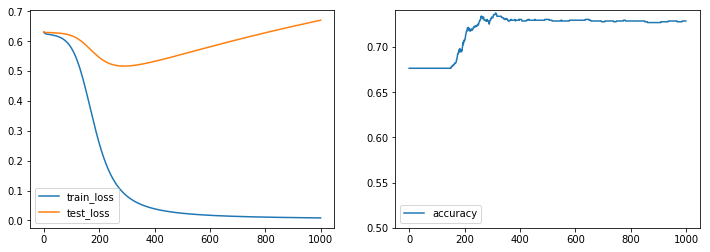

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)

plt.show()

In [52]:
sent_tokens = sent_tokenize("i am very happy. i feel good. this is working really well. i am very sad. tera internet bohot slow hai bhai")
sent_tokens = pd.Series(sent_tokens)
print(sent_tokens)
sent_tokens = count_vectorizer.transform(sent_tokens).toarray()
for sent in sent_tokens:
    sample = np.array(sent)
    sample_tensor = torch.from_numpy(sent).float()
    out = model(sample_tensor)
    _, predicted = torch.max(out.data, -1)
    if predicted.item() == 0: 
        print("null -", predicted.item())
    elif predicted.item() == 1:
        print("symptom - ", predicted.item())
 

0                     i am very happy.
1                         i feel good.
2         this is working really well.
3                       i am very sad.
4    tera internet bohot slow hai bhai
dtype: object
null - 0
null - 0
null - 0
symptom -  1
null - 0


In [47]:
check = ["im not happy"]

In [48]:
check = count_vectorizer.transform(check).toarray()

In [49]:
check.shape

(1, 38953)

In [50]:

check.dtype

dtype('int64')

In [51]:
sample = np.array(check,dtype='int64')
sample.dtype

dtype('int64')

In [52]:
sample_tensor = torch.from_numpy(sample).float()

In [53]:
out = model(sample_tensor)
out

tensor([[-1.6861, -0.2773, -2.8661]], grad_fn=<LogSoftmaxBackward>)

In [54]:
_, predicted = torch.max(out.data, -1)

In [55]:
if predicted.item() == 0: 
    print("null -", predicted.item())
elif predicted.item() == 1:
    print("inconclusive - ", predicted.item())
elif predicted.item() == 2:
    print("conclusive - ", predicted.item())    

inconclusive -  1


In [56]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1092, -0.1107, -0.1141,  ...,  0.0853,  0.0799,  0.0807],
         [ 0.1224,  0.1236,  0.1291,  ..., -0.0602, -0.0601, -0.0607],
         [ 0.0953,  0.0976,  0.1016,  ...,  0.0491,  0.0454,  0.0457],
         ...,
         [-0.1211, -0.1287, -0.1220,  ...,  0.0791,  0.0777,  0.0851],
         [-0.0780, -0.0739, -0.0733,  ..., -0.1023, -0.1083, -0.1054],
         [-0.0795, -0.0803, -0.0800,  ..., -0.0930, -0.1003, -0.0951]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0230, -0.1089,  0.0424, -0.0664, -0.0625, -0.0061, -0.1146, -0.0217,
         -0.0301,  0.0157, -0.3092, -0.2701], requires_grad=True), Parameter containing:
 tensor([[ 0.6369,  0.9034,  0.8641,  0.6660, -1.0326,  0.2876,  0.8278,  0.7811,
           0.7093,  0.3668, -0.9352, -0.5569],
         [-0.3056,  0.4936,  0.9233, -0.3078, -0.5825, -0.8140,  0.9646, -0.5591,
          -0.6588, -0.6178, -0.8532, -0.6452],
         [-0.6466,  0.5541, -0.0889, -0.4142, -0.4628, -0

In [63]:
torch.save(model, 'models/depred1final-38953-12.pt')

In [64]:
model = torch.load('./models/depsha15.pt')
model.eval()

Net(
  (fc1): Linear(in_features=50688, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)

In [65]:
zeros = 0
ones = 0
twos = 0

In [66]:
sent_tokens = sent_tokenize("I want to tell them how I'm not faking it. I want to tell them how I'm really dying inside, how I'm not doing it for attention, but all I get are shrugs and complaining and vague explanations over and over again, about how I dont know how he/she has it. Yeah, I know you've been freinds with him/her for more than 10 Blessed years, but that doesn't give you any right to judge or invalidate my feelings anymore than I already am. Someone new joins the group, and the blame goes on them. Ive known them for years, they can't be faking their mental illness.")
sent_tokens = pd.Series(sent_tokens)
print(sent_tokens)
sent_tokens = count_vectorizer.transform(sent_tokens).toarray()
for sent in sent_tokens:
    sample = np.array(sent)
    sample_tensor = torch.from_numpy(sent).float()
    out = model(sample_tensor)
    _, predicted = torch.max(out.data, -1)
    if predicted.item() == 0: 
        print("null -", predicted.item())
        zeros+=1
    elif predicted.item() == 1:
        print("inconclusive - ", predicted.item())
        ones+=1
    elif predicted.item() == 2:
        print("conclusive - ", predicted.item()) 
        twos+=1

0           I want to tell them how I'm not faking it.
1    I want to tell them how I'm really dying insid...
2    Yeah, I know you've been freinds with him/her ...
3    Someone new joins the group, and the blame goe...
4    Ive known them for years, they can't be faking...
dtype: object


RuntimeError: size mismatch, m1: [1 x 38953], m2: [50688 x 10] at C:\w\1\s\tmp_conda_3.7_021303\conda\conda-bld\pytorch_1565316900252\work\aten\src\TH/generic/THTensorMath.cpp:752

In [67]:
sent_tokens = sent_tokenize("Lately I’ve met new people but I’m still alone. I fell in love too and I thought she liked me too but there’s days where she’s friendly and talkative and other days where I don’t exist to her. At the end of the day I’m alone and it’s the same thing every single day") 
sent_tokens = pd.Series(sent_tokens)
print(sent_tokens)
sent_tokens = count_vectorizer.transform(sent_tokens).toarray()
for sent in sent_tokens:
    sample = np.array(sent)
    sample_tensor = torch.from_numpy(sent).float()
    out = model(sample_tensor)
    _, predicted = torch.max(out.data, -1)
    if predicted.item() == 0: 
        print("null -", predicted.item())
        zeros+=1
    elif predicted.item() == 1:
        print("inconclusive - ", predicted.item())
        ones+=1
    elif predicted.item() == 2:
        print("conclusive - ", predicted.item()) 
        twos+=1

0      Lately I’ve met new people but I’m still alone.
1    I fell in love too and I thought she liked me ...
2    At the end of the day I’m alone and it’s the s...
dtype: object


RuntimeError: size mismatch, m1: [1 x 38953], m2: [50688 x 10] at C:\w\1\s\tmp_conda_3.7_021303\conda\conda-bld\pytorch_1565316900252\work\aten\src\TH/generic/THTensorMath.cpp:752

In [68]:
zeros

0